# **Inteligencia de Mercado**

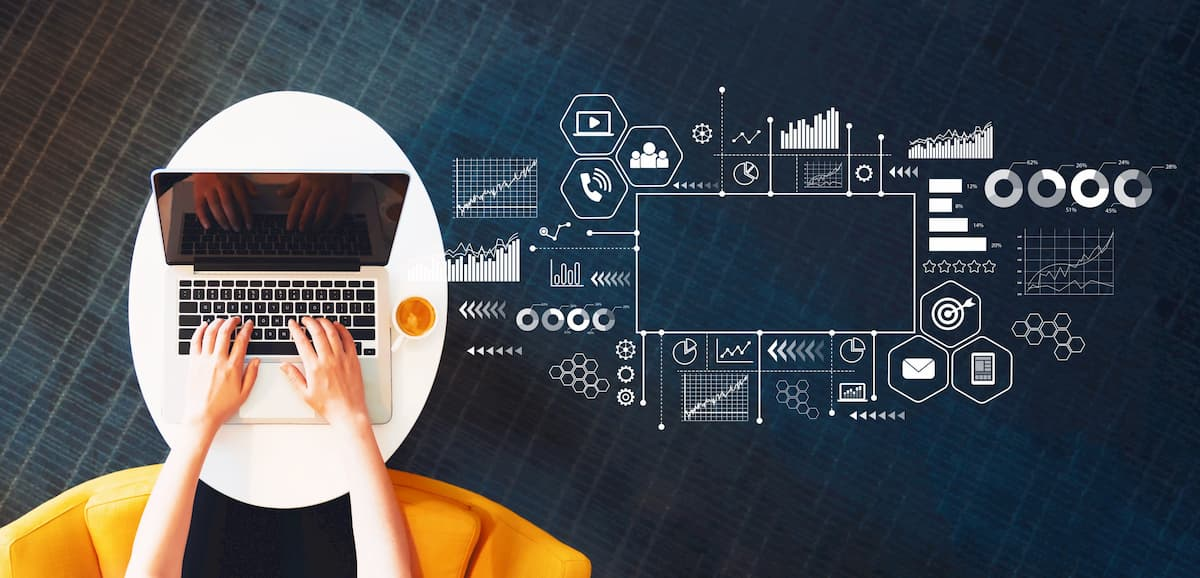

Base de Dados: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

Elaboração: Diogo Antonio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [44]:
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [45]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [47]:

# lida com valores ausentes
df.dropna(inplace=True)

# converte as colunas de data e hora para o tipo datetime
df['Time'] = pd.to_datetime(df['Time'])

# adiciona coluna de receita total
df['Total Revenue'] = df['Unit price'] * df['Quantity']


In [48]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total Revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,2023-04-10 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,2023-04-10 10:29:00,Cash,76.40,4.761905,3.8200,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,2023-04-10 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,2023-04-10 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,2023-04-10 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,604.17


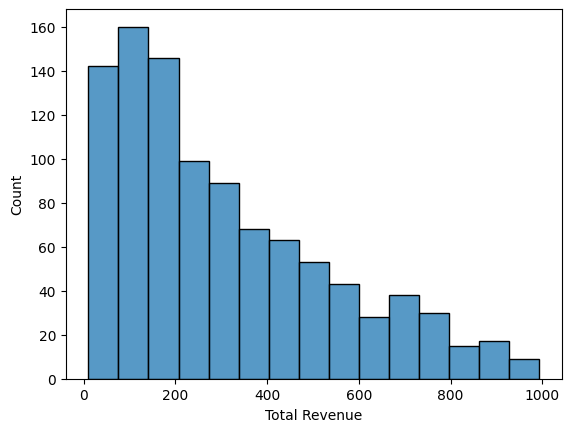

In [12]:
# distribuição das vendas totais
sns.histplot(df['Total Revenue'])
plt.show()




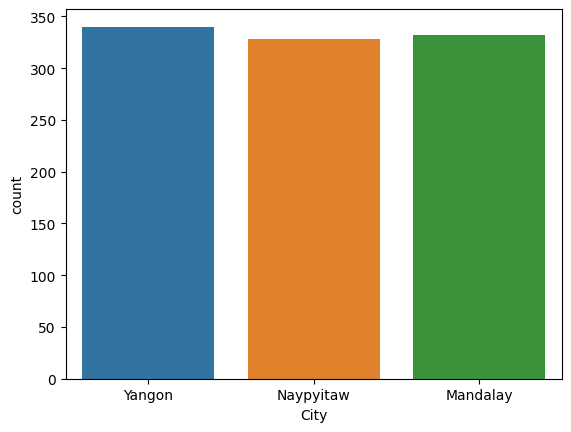

In [14]:
# vendas por localização
sns.countplot(x='City', data=df)
plt.show()



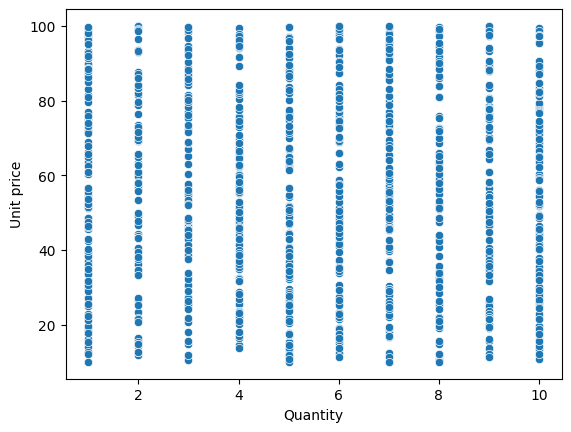

In [15]:
# correlação entre a quantidade vendida e o preço unitário
sns.scatterplot(x='Quantity', y='Unit price', data=df)
plt.show()


In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')


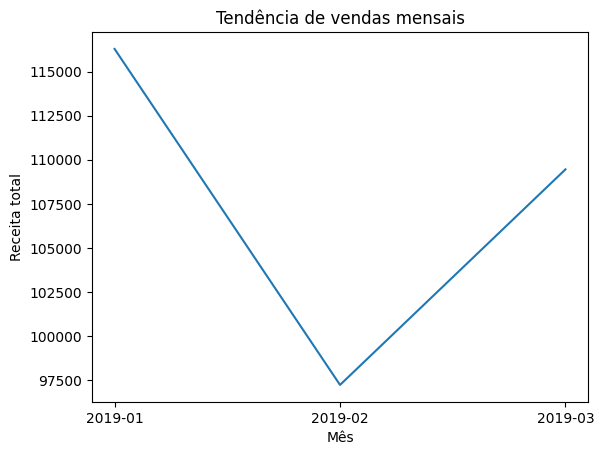

In [61]:


# Convertendo a coluna "Date" para o tipo de dado "datetime"
df["Date"] = pd.to_datetime(df["Date"])

# Criando uma coluna com o ano e mês
df["YearMonth"] = df["Date"].dt.strftime("%Y-%m")


# Agrupando as vendas por ano e mês e calculando a receita total
monthly_sales = df.groupby('YearMonth')['Total'].sum()

# Plotando um gráfico de linha das vendas mensais
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel("Mês")
plt.ylabel("Receita total")
plt.title("Tendência de vendas mensais")
plt.show()




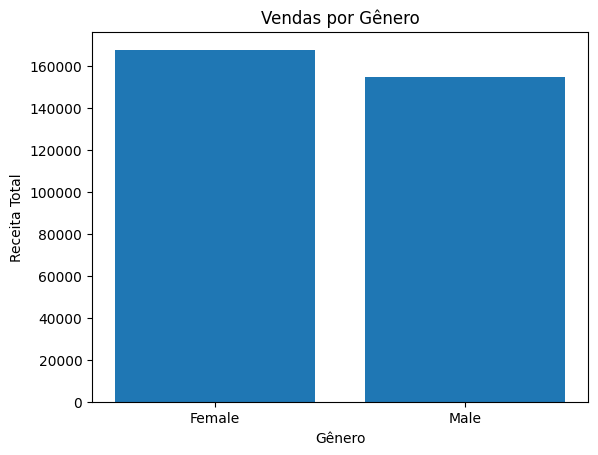

In [66]:
# Agrupando as vendas por gênero e calculando a receita total
vendas_por_genero = df.groupby('Gender')['Total'].sum()

# Criando um gráfico de barras das vendas por gênero
plt.bar(vendas_por_genero.index, vendas_por_genero.values)
plt.xlabel('Gênero')
plt.ylabel('Receita Total')
plt.title('Vendas por Gênero')
plt.show()


In [68]:
df_gender_city = df.groupby(['City', 'Gender']).size().reset_index(name='count')


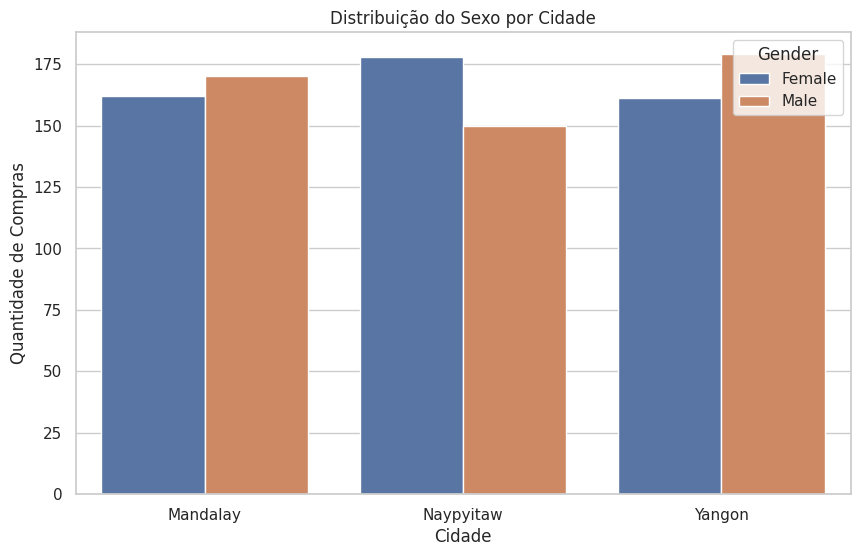

In [69]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x="City", y="count", hue="Gender", data=df_gender_city)

plt.title('Distribuição do Sexo por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Quantidade de Compras')

plt.show()

In [70]:
product_sales = df.groupby("Product line").agg({"Total": "sum", "gross income": "sum"}).reset_index()


In [71]:
product_sales = product_sales.sort_values("Total", ascending=False)


In [77]:
product_sales["profit margin"] = product_sales["gross income"] / product_sales["Total"]


In [78]:
print(product_sales[["Product line", "Total", "profit margin"]])


             Product line       Total  profit margin
2      Food and beverages  56144.8440       0.047619
5       Sports and travel  55122.8265       0.047619
0  Electronic accessories  54337.5315       0.047619
1     Fashion accessories  54305.8950       0.047619
4      Home and lifestyle  53861.9130       0.047619
3       Health and beauty  49193.7390       0.047619


Text(0.5, 1.0, 'Vendas por produto')

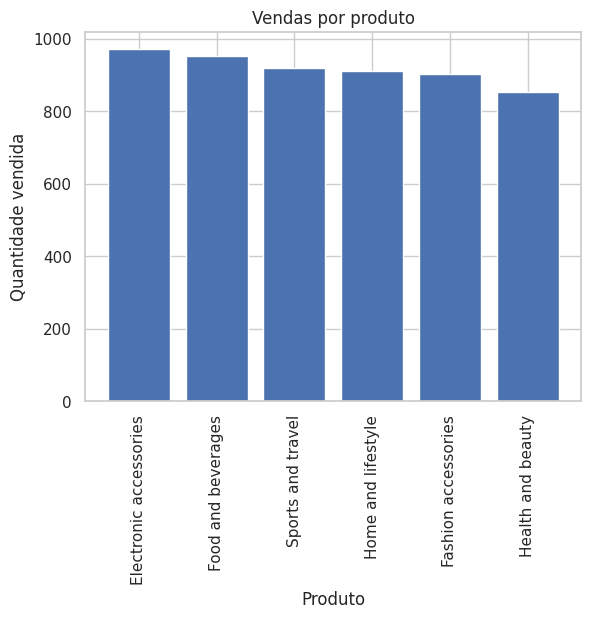

In [79]:

# Agrupando por produto e somando as quantidades vendidas
product_sales = df.groupby('Product line')['Quantity'].sum()

# Ordenando os produtos por quantidade vendida em ordem decrescente
product_sales = product_sales.sort_values(ascending=False)

# Plotando um gráfico de barras das vendas por produto
plt.bar(product_sales.index, product_sales.values)
plt.xticks(rotation=90)
plt.xlabel("Produto")
plt.ylabel("Quantidade vendida")
plt.title("Vendas por produto")




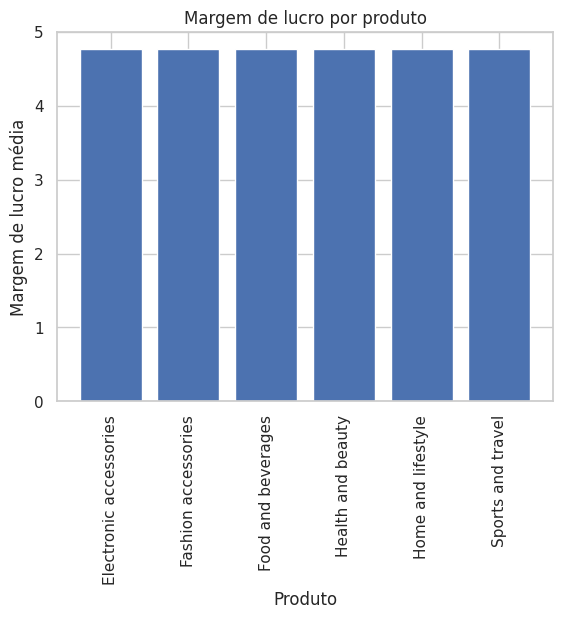

In [80]:
# Agrupando por produto e calculando a margem de lucro média
product_profit = df.groupby('Product line')['gross margin percentage'].mean()

# Ordenando os produtos por margem de lucro em ordem decrescente
product_profit = product_profit.sort_values(ascending=False)

# Plotando um gráfico de barras da margem de lucro por produto
plt.figure()
plt.bar(product_profit.index, product_profit.values)
plt.xticks(rotation=90)
plt.xlabel("Produto")
plt.ylabel("Margem de lucro média")
plt.title("Margem de lucro por produto")

plt.show()

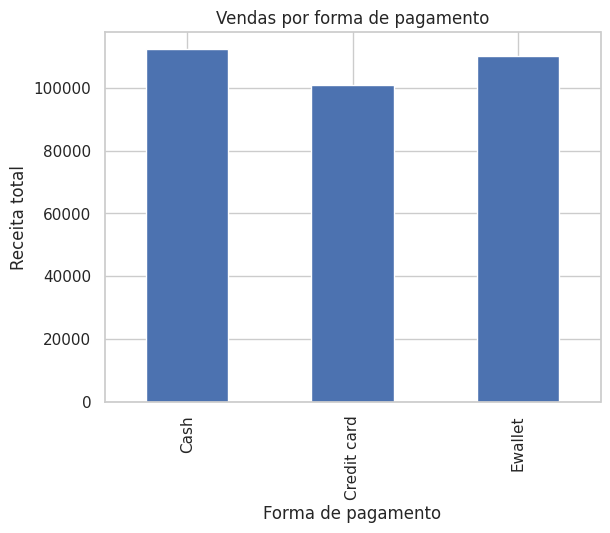

In [82]:


# Agrupando os dados por forma de pagamento e calculando a receita total em cada uma delas
payment_sales = df.groupby('Payment')['Total'].sum()

# Plotando um gráfico de barras das vendas por forma de pagamento
payment_sales.plot(kind='bar')
plt.xlabel("Forma de pagamento")
plt.ylabel("Receita total")
plt.title("Vendas por forma de pagamento")
plt.show()


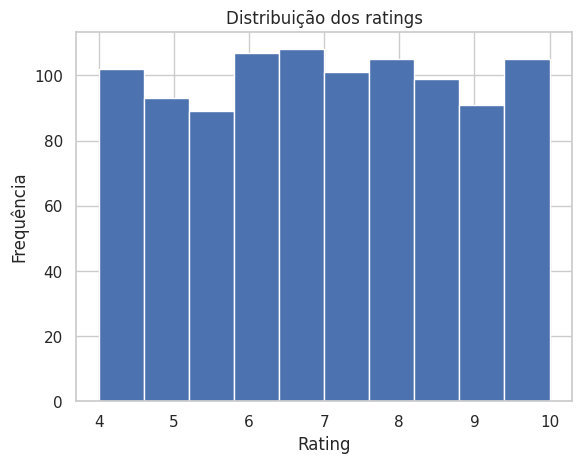

In [87]:
plt.title("Distribuição dos ratings")
plt.hist(df['Rating'])
plt.xlabel("Rating")
plt.ylabel("Frequência")
plt.show()


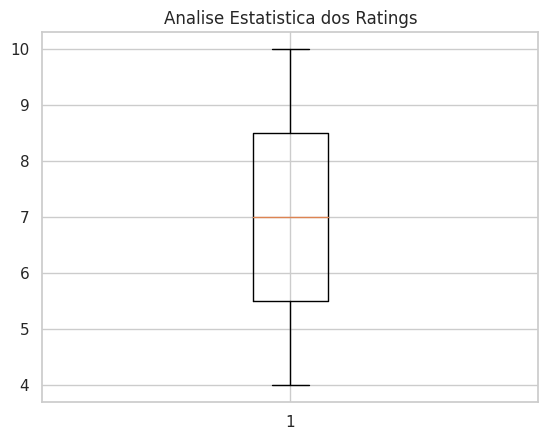

In [88]:
plt.title("Analise Estatistica dos Ratings")
plt.boxplot(df['Rating'])
plt.show()


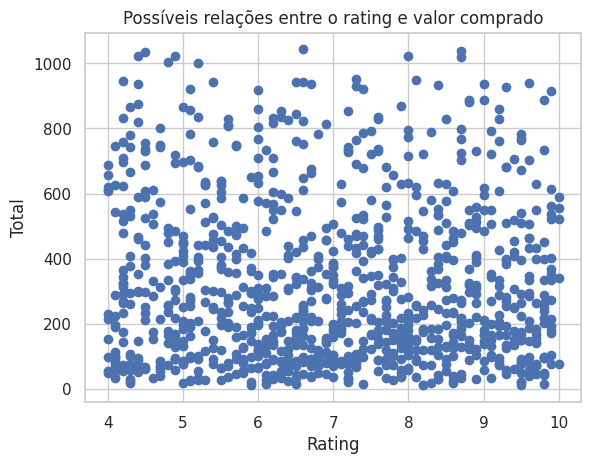

In [89]:
plt.title("Possíveis relações entre o rating e valor comprado")
plt.scatter(df['Rating'], df['Total'])
plt.xlabel("Rating")
plt.ylabel("Total")
plt.show()


In [86]:
print("Média do Rating: ", df['Rating'].mean())
print("Mediana do Rating: ", df['Rating'].median())
print("Desvio padrão do Rating: ", df['Rating'].std())


Média do Rating:  6.9727
Mediana do Rating:  7.0
Desvio padrão do Rating:  1.7185802943791215
